
# New section

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# https://pypi.python.org/pypi/pydot
!apt-get -qq install -y graphviz && pip install pydot
import pydot
import graphviz

In [ ]:
from google.colab import files


In [ ]:
from zipfile import ZipFile
file = "/content/drive/MyDrive/Colab Notebooks/Nuclear.zip"

with ZipFile(file,'r') as zips:
  zips.extractall()
  print('Done')

Done


In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [ ]:
pip install 'h5py==2.10.0' --force-reinstall

     |████████████████████████████████| 2.9 MB 21.8 MB/s 
     |████████████████████████████████| 15.7 MB 36.5 MB/s 
  Attempting uninstall: six
    Found existing installation: six 1.15.0
    Uninstalling six-1.15.0:
      Successfully uninstalled six-1.15.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lucid 0.3.10 requires umap-learn, which is not installed.
tensorflow 1.15.2 requires gast==0.2.2, but you have gast 0.4.0 which is incompatible.
lucid 0.3.10 requires numpy<=1.19, but you have numpy 1.21.5 which is incompatible.
yellowbrick 1.3.post1 requires numpy<1.20

In [ ]:
files.upload()

Saving data_augmentation.py to data_augmentation.py


{'data_augmentation.py': b'# -*- coding: utf-8 -*-\n"""\nCreated on Tue Feb  4 18:10:48 2020\n\n@author: KiranKharel\n"""\nfrom keras.preprocessing.image import ImageDataGenerator\nseed = 1\n\ndef perform_augmentation(x_check, y_check, split_size, BATCH_SIZE):\n    \n    #creating the training image and its respective mask\n    data_gen_args = dict(\n            shear_range=0.5,\n            rotation_range=40,\n            zoom_range=0.2,\n            width_shift_range=0.2,\n            height_shift_range=0.2,\n            fill_mode=\'reflect\'#nearest\n            )\n    \n    #creating training image and mask generator\n    image_datagen = ImageDataGenerator(**data_gen_args)\n    mask_datagen = ImageDataGenerator(**data_gen_args)\n    \n    #creating the validation Image and Mask generator\n    image_datagen_val = ImageDataGenerator()\n    mask_datagen_val = ImageDataGenerator()\n    \n    # Provide the same seed and keyword arguments to the fit and flow methods\n    image_datagen.fi

In [ ]:
files.upload()


Saving data_generation.py to data_generation.py


{'data_generation.py': b'# -*- coding: utf-8 -*-\n"""\nCreated on Tue Feb  4 17:52:14 2020\n\n@author: KiranKharel\n"""\n#importing libraries\nimport os\nimport sys\nimport numpy as np\nimport warnings\nimport cv2\nfrom tqdm import tqdm\nwarnings.filterwarnings(\'ignore\')\n#seeding\nseed = 42\n\nclass DataGen:\n    def __init__(self, ids, datasettype, path, image_size = 128, img_channels = 3):\n        self.ids = ids\n        self.path = path\n        self.image_size = image_size\n        self.datasettype = datasettype\n        self.img_channels = img_channels\n        \n    def __load__(self, id_name):\n        ##path \n        image_path = os.path.join(self.path, id_name, "images",id_name)+".png"\n        mask_path = os.path.join(self.path, id_name, "masks/")\n\n        #reading image\n        image = cv2.imread(image_path,1)\n        image = cv2.resize(image, (self.image_size, self.image_size))\n        \n        #reading mask\n        mask = np.zeros((self.image_size, self.image_s

In [ ]:
files.upload()



Saving UNet_Model.py to UNet_Model.py


{'UNet_Model.py': b'# -*- coding: utf-8 -*-\n"""\nCreated on Tue Feb  4 18:27:15 2020\n\n@author: KiranKharel\n"""\nfrom keras.models import Model\nfrom keras.layers import Input, UpSampling2D\nfrom keras.layers.core import Dropout, Lambda\nfrom keras.layers.convolutional import Conv2D\nfrom keras.layers.pooling import MaxPooling2D\nfrom keras.layers import Concatenate\nfrom utils import mean_iou\n\nclass UNet:\n    def __init__(self, image_size = 128, img_channels = 3, kernel_size = (3,3), padding = \'same\', strides = 1, kernel_initializer = \'he_normal\', activation = \'relu\'):\n        self.image_size = image_size\n        self.img_channels = img_channels\n        self.kernel_size = kernel_size\n        self.padding = padding\n        self.strides = strides\n        self.kernel_initializer = kernel_initializer\n        self.activation = activation\n\n    def down_block(self, x, filters):\n        c = Conv2D(filters,\n                self.kernel_size, \n                padding=self

In [ ]:
files.upload()


Saving UNet_Model1.py to UNet_Model1.py


{'UNet_Model1.py': b'# -*- coding: utf-8 -*-\r\n"""\r\nCreated on Tue Feb  4 18:27:15 2020\r\n\r\n@author: KiranKharel\r\n"""\r\nfrom keras.models import Model\r\nfrom keras.layers import Input, UpSampling2D\r\nfrom keras.layers.core import Dropout, Lambda\r\nfrom keras.layers.convolutional import Conv2D\r\nfrom keras.layers.pooling import MaxPooling2D\r\nfrom keras.layers import Concatenate\r\nfrom utils import mean_iou\r\n\r\n\r\nclass UNet:\r\n    def __init__(self, image_size=128, img_channels=3, kernel_size=(3, 3), padding=\'same\', strides=1,\r\n                 kernel_initializer=\'he_normal\', activation=\'relu\'):\r\n        self.image_size = image_size\r\n        self.img_channels = img_channels\r\n        self.kernel_size = kernel_size\r\n        self.padding = padding\r\n        self.strides = strides\r\n        self.kernel_initializer = kernel_initializer\r\n        self.activation = activation\r\n\r\n    def down_block(self, x, filters):\r\n        c = Conv2D(filters,\r\n

In [ ]:
files.upload()

Saving utils.py to utils.py


{'utils.py': b'# -*- coding: utf-8 -*-\n"""\nCreated on Tue Feb  4 18:32:45 2020\n\n@author: Khare\n"""\nimport numpy as np\nimport tensorflow as tf\nfrom keras import backend as K\n#evaluation metric\n#Intersection over UNion (IOU) metric:\ndef mean_iou(y_true, y_pred):\n    prec = []\n    for t in np.arange(0.5, 1.0, 0.05):\n        y_pred_ = tf.to_int32(y_pred > t)\n        score, up_opt = tf.metrics.mean_iou(y_true, y_pred_, 2)\n        K.get_session().run(tf.local_variables_initializer())\n        with tf.control_dependencies([up_opt]):\n            score = tf.identity(score)\n        prec.append(score)\n    return K.mean(K.stack(prec), axis=0)'}

In [ ]:
import os
import random
import pandas as pd
import matplotlib.pyplot as plt
from data_generation import *
from data_augmentation import perform_augmentation
from utils import mean_iou
import warnings

Using TensorFlow backend.


In [ ]:
IMAGE_SIZE = 128
BATCH_SIZE = 16
IMG_CHANNELS = 3
EPOCHS = 5
TRAIN_PATH = '/content/Nucleus-Segmentation-using-Deep-Learning-master/dataset/stage1_train'
TEST_PATH = '/content/Nucleus-Segmentation-using-Deep-Learning-master/dataset/stage1_test'

#Training AND testing Ids
train_ids = next (os.walk(TRAIN_PATH))[1]
test_ids = next(os.walk(TEST_PATH))[0]

print(len(train_ids), len(test_ids))

670 76


In [ ]:
train=np.array(train_ids)
print(train[1].shape)

()


In [ ]:
gen = DataGen(train_ids, "train", TRAIN_PATH, image_size=IMAGE_SIZE)
X_train, Y_train = gen.__getitems__()

Getting and Resizing train images and masks.....


100%|██████████| 670/670 [00:28<00:00, 23.24it/s]


In [ ]:
print(X_train.shape)

(670, 128, 128, 3)


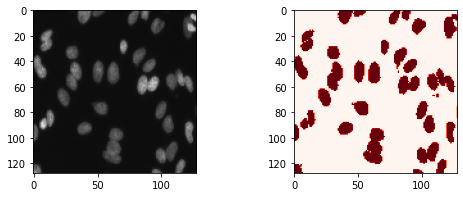

In [ ]:

#plotting the corresponding nucleus and its respective mask
index = random.randint(0, len(X_train)-1)

fig, ax = plt.subplots(1, 2, figsize = (8,3))
fig.subplots_adjust(hspace = 0.4, wspace = 0.4)
ax[0].imshow(X_train[index])
#plt.imshow(np.reshape(y_check[index], (IMAGE_SIZE, IMAGE_SIZE)),cmap='gray')
plt.imshow(np.squeeze(Y_train)[index], cmap='Reds')
plt.show()

In [ ]:
#data augmentation using predefined class
x, y, x_val, y_val = perform_augmentation(X_train, Y_train, split_size=0.9, BATCH_SIZE=BATCH_SIZE)

In [ ]:
#combine generators into one which yields image and masks
train_generator = zip(x, y)
val_generator = zip(x_val, y_val)

In [ ]:
len(x), len(y), len(x_val), len(y_val)

(38, 38, 5, 5)

In [ ]:
from UNet_Model import UNet


In [ ]:
from UNet_Model1 import UNet


In [ ]:
getUNet = UNet()

In [ ]:
model = getUNet.generate_unet()

In [ ]:
#print(history.params)
# check the keys of history object
print(results.history)

{'val_loss': [0.14030180871486664, 0.058224987238645554, 0.0834115520119667, 0.12439373880624771, 0.13391077518463135, 0.0565791130065918, 0.03590773791074753, 0.04493454098701477, 0.013267564587295055, 0.042229264974594116, 0.08645053952932358, 0.049900323152542114, 0.030597925186157227, 0.020279062911868095, 0.006989724468439817], 'val_jaccard_distance': [28.77334213256836, 31.389873504638672, 24.074459075927734, 23.988914489746094, 24.020828247070312, 24.195865631103516, 24.173948287963867, 21.886302947998047, 24.483333587646484, 26.28531265258789, 23.181264877319336, 21.141437530517578, 23.01517105102539, 25.113719940185547, 21.290456771850586], 'val_dice_coef': [0.8280103802680969, 0.8205273747444153, 0.8575488924980164, 0.8617879152297974, 0.8605722188949585, 0.8494137525558472, 0.8564573526382446, 0.8774526715278625, 0.859327495098114, 0.8437511324882507, 0.861947238445282, 0.8822231292724609, 0.8636531829833984, 0.8499240875244141, 0.8749338388442993], 'val_accuracy': [0.970131

In [ ]:
batch_size=16
train_steps = len(train_ids)//batch_size
from keras.callbacks import EarlyStopping, ModelCheckpoint

earlystopper = EarlyStopping(patience=3, verbose=1,monitor='val_acc')
checkpointer = ModelCheckpoint('/content/drive/MyDrive/Best_model-dsbowl2018-2.h5', verbose=1, save_best_only=True)

results = model.fit_generator(train_generator, validation_data=val_generator, validation_steps=10, steps_per_epoch=250, epochs=20, callbacks=[earlystopper, checkpointer])


Epoch 1/20
250/250 [==============================] - 840s 3s/step - loss: 0.1978 - jaccard_index: 47.2442 - dice_coef: 0.6591 - accuracy: 0.8835 - val_loss: 0.0517 - val_jaccard_index: 30.4761 - val_dice_coef: 0.8047 - val_accuracy: 0.9685

Epoch 00001: val_loss improved from inf to 0.05174, saving model to /content/drive/MyDrive/Best_model-dsbowl2018-2.h5
Epoch 2/20
250/250 [==============================] - 838s 3s/step - loss: 0.1030 - jaccard_index: 32.5415 - dice_coef: 0.8034 - accuracy: 0.9121 - val_loss: 0.1020 - val_jaccard_index: 27.6451 - val_dice_coef: 0.8195 - val_accuracy: 0.9702

Epoch 00002: val_loss did not improve from 0.05174
Epoch 3/20
250/250 [==============================] - 837s 3s/step - loss: 0.0919 - jaccard_index: 29.6794 - dice_coef: 0.8252 - accuracy: 0.9141 - val_loss: 0.0853 - val_jaccard_index: 25.1406 - val_dice_coef: 0.8381 - val_accuracy: 0.9721

Epoch 00003: val_loss did not improve from 0.05174
Epoch 4/20
250/250 [==============================] -

In [ ]:
batch_size=16
train_steps = len(train_ids)//batch_size
from keras.callbacks import EarlyStopping, ModelCheckpoint

earlystopper = EarlyStopping(patience=3, verbose=1,monitor='val_acc')
checkpointer = ModelCheckpoint('/content/Nucleus-Segmentation-using-Deep-Learning-master/dataset/model-dsbowl2018-2.h5', verbose=1, save_best_only=True)

results = model.fit_generator(train_generator, validation_data=val_generator, validation_steps=10, steps_per_epoch=250, epochs=15, callbacks=[earlystopper, checkpointer])


Epoch 1/15
250/250 [==============================] - 904s 4s/step - loss: 0.1915 - jaccard_distance: 46.3727 - dice_coef: 0.6621 - accuracy: 0.8830 - val_loss: 0.1403 - val_jaccard_distance: 28.7733 - val_dice_coef: 0.8280 - val_accuracy: 0.9701

Epoch 00001: val_loss improved from inf to 0.14030, saving model to /content/Nucleus-Segmentation-using-Deep-Learning-master/dataset/model-dsbowl2018-2.h5
Epoch 2/15
250/250 [==============================] - 910s 4s/step - loss: 0.1017 - jaccard_distance: 32.0760 - dice_coef: 0.8045 - accuracy: 0.9121 - val_loss: 0.0582 - val_jaccard_distance: 31.3899 - val_dice_coef: 0.8205 - val_accuracy: 0.9721

Epoch 00002: val_loss improved from 0.14030 to 0.05822, saving model to /content/Nucleus-Segmentation-using-Deep-Learning-master/dataset/model-dsbowl2018-2.h5
Epoch 3/15
250/250 [==============================] - 915s 4s/step - loss: 0.0927 - jaccard_distance: 29.8680 - dice_coef: 0.8213 - accuracy: 0.9140 - val_loss: 0.0834 - val_jaccard_distanc

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

earlystopper = EarlyStopping(verbose=1,patience=3,monitor='val_accuracy')
checkpointer = ModelCheckpoint('/content/Nucleus-Segmentation-using-Deep-Learning-master/model-dsbowl2018-1.h5', verbose=1, save_best_only=True)
results = model.fit_generator(train_generator, validation_data=val_generator, validation_steps=10, steps_per_epoch=len(X_train) // BATCH_SIZE, epochs=15, callbacks=[earlystopper, checkpointer])

Epoch 1/15
41/41 [==============================] - 153s 4s/step - loss: 0.1817 - accuracy: 0.8929 - val_loss: 0.1012 - val_accuracy: 0.9624

Epoch 00001: val_loss improved from inf to 0.10124, saving model to /content/Nucleus-Segmentation-using-Deep-Learning-master/model-dsbowl2018-1.h5
Epoch 2/15
41/41 [==============================] - 157s 4s/step - loss: 0.1200 - accuracy: 0.9085 - val_loss: 0.1008 - val_accuracy: 0.9673

Epoch 00002: val_loss improved from 0.10124 to 0.10079, saving model to /content/Nucleus-Segmentation-using-Deep-Learning-master/model-dsbowl2018-1.h5
Epoch 3/15
41/41 [==============================] - 151s 4s/step - loss: 0.1140 - accuracy: 0.9098 - val_loss: 0.0928 - val_accuracy: 0.9689

Epoch 00003: val_loss improved from 0.10079 to 0.09285, saving model to /content/Nucleus-Segmentation-using-Deep-Learning-master/model-dsbowl2018-1.h5
Epoch 4/15
41/41 [==============================] - 167s 4s/step - loss: 0.1091 - accuracy: 0.9116 - val_loss: 0.1005 - val_a

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

earlystopper = EarlyStopping(verbose=1,patience=3,monitor='val_accuracy')
checkpointer = ModelCheckpoint('/content/Nucleus-Segmentation-using-Deep-Learning-master/model-dsbowl2018-1.h5', verbose=1, save_best_only=True)
results = model.fit_generator(train_generator, validation_data=val_generator, validation_steps=10, steps_per_epoch=250, epochs=15, callbacks=[earlystopper, checkpointer])

Epoch 1/15
250/250 [==============================] - 865s 3s/step - loss: 0.0964 - accuracy: 0.9147 - val_loss: 0.0531 - val_accuracy: 0.9737

Epoch 00001: val_loss improved from inf to 0.05314, saving model to /content/Nucleus-Segmentation-using-Deep-Learning-master/model-dsbowl2018-1.h5
Epoch 2/15
250/250 [==============================] - 874s 3s/step - loss: 0.0883 - accuracy: 0.9160 - val_loss: 0.0635 - val_accuracy: 0.9740

Epoch 00002: val_loss did not improve from 0.05314
Epoch 3/15
250/250 [==============================] - 885s 4s/step - loss: 0.0873 - accuracy: 0.9161 - val_loss: 0.1077 - val_accuracy: 0.9735

Epoch 00003: val_loss did not improve from 0.05314
Epoch 4/15
250/250 [==============================] - 912s 4s/step - loss: 0.0858 - accuracy: 0.9168 - val_loss: 0.0506 - val_accuracy: 0.9739

Epoch 00004: val_loss improved from 0.05314 to 0.05057, saving model to /content/Nucleus-Segmentation-using-Deep-Learning-master/model-dsbowl2018-1.h5
Epoch 5/15
250/250 [====

In [ ]:
'''
checkpointer = tf.keras.callbacks.ModelCheckpoint('model_for_nuclei.h5', verbose=1, save_best_only=True)

callbacks = [
        tf.keras.callbacks.EarlyStopping(patience=2, monitor='val_loss'),
        tf.keras.callbacks.TensorBoard(log_dir='logs')]

results = model.fit_generator(train_generator, validation_data=val_generator, validation_steps=10, steps_per_epoch=250, epochs=15, callbacks=[earlystopper, checkpointer])
'''

In [ ]:
'''
from keras.callbacks import EarlyStopping, ModelCheckpoint

earlystopper = EarlyStopping(verbose=1,patience=3,monitor='val_accuracy')
checkpointer = ModelCheckpoint('/content/Nucleus-Segmentation-using-Deep-Learning-master/dataset/model-dsbowl2018-1.h5', verbose=1, save_best_only=True)
results = model.fit_generator(train_generator, validation_data=val_generator, steps_per_epoch=203,validation_steps=10, epochs=15, callbacks=[earlystopper, checkpointer])

'''

In [ ]:
# https://pypi.python.org/pypi/pydot
!apt-get -qq install -y graphviz && pip install pydot
import pydot

In [ ]:
from tensorflow.keras.utils import plot_model
print(model.summary())
plot_model(model,to_file='Thesis_Model.png')

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 128, 128, 3)  0                                            
__________________________________________________________________________________________________
lambda_2 (Lambda)               (None, 128, 128, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_20 (Conv2D)              (None, 128, 128, 16) 448         lambda_2[0][0]                   
__________________________________________________________________________________________________
dropout_10 (Dropout)            (None, 128, 128, 16) 0           conv2d_20[0][0]                  
____________________________________________________________________________________________

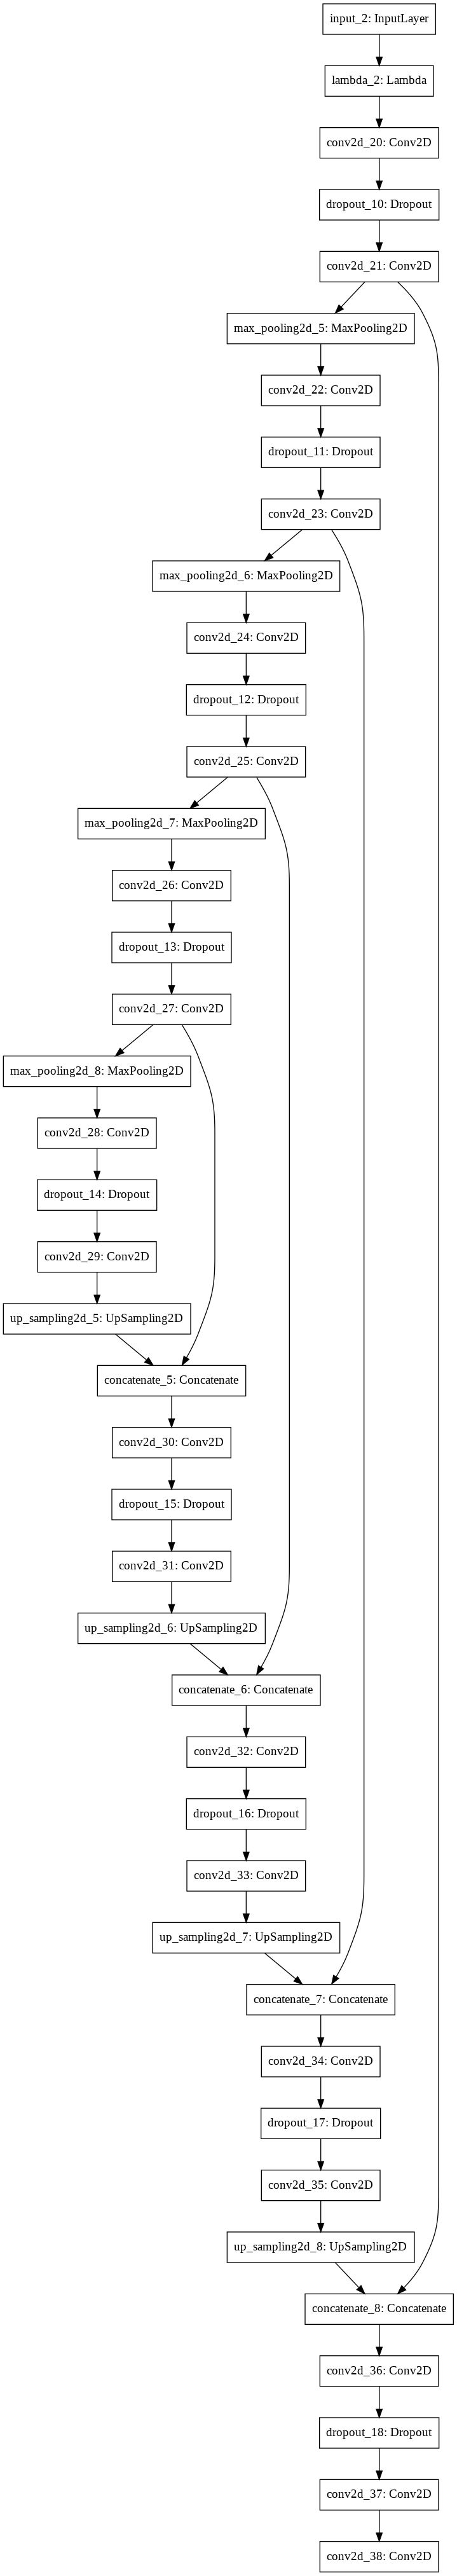

In [ ]:
from tensorflow.keras.utils import plot_model
from keras.models import Sequential
from keras.layers import Dense
print(model.summary())
plot_model(model,to_file='Thesis_Model.png')

In [ ]:

import tensorflow as tf
import os
import random
import numpy as np
 
from tqdm import tqdm 
import tensorflow as tf

from skimage.io import imread, imshow
from skimage.transform import resize
import matplotlib.pyplot as plt

IMG_WIDTH = 128
IMG_HEIGHT = 128
IMG_CHANNELS = 3  

In [ ]:

#Build the model
inputs = tf.keras.layers.Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
s = tf.keras.layers.Lambda(lambda x: x / 255)(inputs)

#Contraction path
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
c1 = tf.keras.layers.Dropout(0.1)(c1)
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
c2 = tf.keras.layers.Dropout(0.1)(c2)
c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)
 
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
c3 = tf.keras.layers.Dropout(0.2)(c3)
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)
 
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
c4 = tf.keras.layers.Dropout(0.2)(c4)
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
p4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c4)
 
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
c5 = tf.keras.layers.Dropout(0.3)(c5)
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

#Expansive path 
u6 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
u6 = tf.keras.layers.concatenate([u6, c4])
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
c6 = tf.keras.layers.Dropout(0.2)(c6)
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)
 
u7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
u7 = tf.keras.layers.concatenate([u7, c3])
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
c7 = tf.keras.layers.Dropout(0.2)(c7)
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)
 
u8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
u8 = tf.keras.layers.concatenate([u8, c2])
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
c8 = tf.keras.layers.Dropout(0.1)(c8)
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)
 
u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
c9 = tf.keras.layers.Dropout(0.1)(c9)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)
 
outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)
 
model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()



Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 lambda_1 (Lambda)              (None, 128, 128, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv2d_19 (Conv2D)             (None, 128, 128, 16  448         ['lambda_1[0][0]']               
                                )                                                                 
                                                                                            

In [ ]:
checkpointer = tf.keras.callbacks.ModelCheckpoint('/content/Nucleus-Segmentation-using-Deep-Learning-master/model-dsbowl20182.h5', verbose=1, save_best_only=True)

callbacks = [
        tf.keras.callbacks.EarlyStopping(patience=2, monitor='val_accuracy'),
        tf.keras.callbacks.TensorBoard(log_dir='logs')]

results = model.fit(X_train, Y_train, batch_size=16, epochs=15, callbacks=callbacks)

Epoch 1/15
24/42 [================>.............] - ETA: 51s - loss: 0.4872 - accuracy: 0.8279

In [ ]:
checkpointer = tf.keras.callbacks.ModelCheckpoint('/content/Nucleus-Segmentation-using-Deep-Learning-master/model-dsbowl2018-1.h5', verbose=1, save_best_only=True)

callbacks = [
        tf.keras.callbacks.EarlyStopping(patience=2, monitor='val_loss'),
        tf.keras.callbacks.TensorBoard(log_dir='logs')]

results = model.fit(X_train, Y_train, validation_split=0.1, batch_size=16, epochs=15, callbacks=callbacks)

Epoch 1/15
38/38 [==============================] - 109s 3s/step - loss: 0.1916 - accuracy: 0.9032 - val_loss: 0.1578 - val_accuracy: 0.9372
Epoch 2/15
38/38 [==============================] - 109s 3s/step - loss: 0.1398 - accuracy: 0.9444 - val_loss: 0.1098 - val_accuracy: 0.9564
Epoch 3/15
38/38 [==============================] - 112s 3s/step - loss: 0.1173 - accuracy: 0.9529 - val_loss: 0.1040 - val_accuracy: 0.9578
Epoch 4/15
 7/38 [====>.........................] - ETA: 1:30 - loss: 0.0983 - accuracy: 0.9632

In [ ]:
'''
from keras.callbacks import EarlyStopping, ModelCheckpoint

earlystopper = EarlyStopping(verbose=1,patience=3,monitor='val_accuracy')
checkpointer = ModelCheckpoint('/content/Nucleus-Segmentation-using-Deep-Learning-master/model-dsbowl2018-1.h5', verbose=1, save_best_only=True)
results = model.fit_generator(train_generator, validation_data=val_generator, validation_steps=10, steps_per_epoch=250, epochs=15, callbacks=[earlystopper, checkpointer])
'''

Epoch 1/15
 50/250 [=====>........................] - ETA: 12:13 - loss: 0.4180 - accuracy: 0.8101

In [ ]:
'''
from keras.callbacks import EarlyStopping, ModelCheckpoint

earlystopper = EarlyStopping(verbose=1,patience=3,monitor='val_accuracy')
checkpointer = ModelCheckpoint('/content/Nucleus-Segmentation-using-Deep-Learning-master/model-dsbowl2018-1.h5', verbose=1, save_best_only=True)
results = model.fit_generator(train_generator, validation_data=val_generator, validation_steps=10, steps_per_epoch=250, epochs=15, callbacks=[earlystopper, checkpointer])
'''

Epoch 1/15
 50/250 [=====>........................] - ETA: 12:13 - loss: 0.4180 - accuracy: 0.8101

In [ ]:
'''
from keras.callbacks import EarlyStopping, ModelCheckpoint

earlystopper = EarlyStopping(verbose=1,patience=3,monitor='val_accuracy')
checkpointer = ModelCheckpoint('/content/Nucleus-Segmentation-using-Deep-Learning-master/model-dsbowl2018-1.h5', verbose=1, save_best_only=True)
results = model.fit_generator(train_generator, validation_data=val_generator, validation_steps=10, steps_per_epoch=250, epochs=15, callbacks=[earlystopper, checkpointer])
'''

Epoch 1/15
 50/250 [=====>........................] - ETA: 12:13 - loss: 0.4180 - accuracy: 0.8101

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
lambda (Lambda)                 (None, 128, 128, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 128, 128, 16) 448         lambda[0][0]                     
__________________________________________________________________________________________________
dropout (Dropout)               (None, 128, 128, 16) 0           conv2d[0][0]                     
______________________________________________________________________________________________

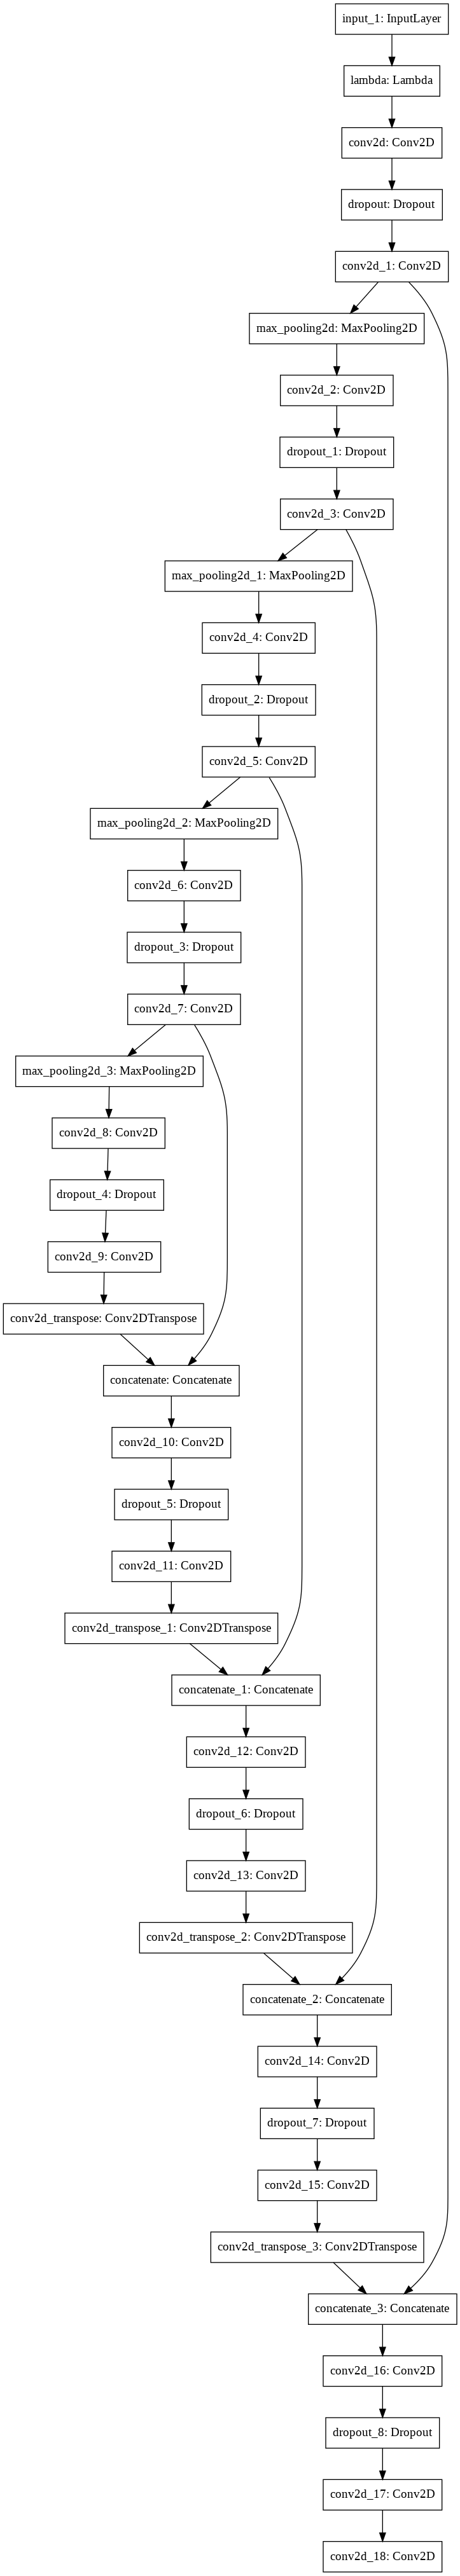

In [ ]:
from tensorflow.keras.utils import plot_model
print(model.summary())
plot_model(model,to_file='Thesis_Model_Cov2DTran.png')

In [ ]:
'''

import tensorflow as tf
import os
import random
import numpy as np
 
from tqdm import tqdm 

from skimage.io import imread, imshow
from skimage.transform import resize
import matplotlib.pyplot as plt


IMG_WIDTH = 128
IMG_HEIGHT = 128
IMG_CHANNELS = 3 

inputs = tf.keras.layers.Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
s = tf.keras.layers.Lambda(lambda x: x / 255)(inputs)

#Contraction path
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
c1 = tf.keras.layers.Dropout(0.1)(c1)
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
p1 = tf.keras.layers.AveragePooling2D((2, 2))(c1)

c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
c2 = tf.keras.layers.Dropout(0.1)(c2)
c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
p2 = tf.keras.layers.AveragePooling2D((2, 2))(c2)
 
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
c3 = tf.keras.layers.Dropout(0.2)(c3)
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
p3 = tf.keras.layers.AveragePooling2D((2, 2))(c3)
 
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
c4 = tf.keras.layers.Dropout(0.2)(c4)
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
p4 = tf.keras.layers.AveragePooling2D(pool_size=(2, 2))(c4)
 
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
c5 = tf.keras.layers.Dropout(0.3)(c5)
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

#Expansive path 
u6 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
u6 = tf.keras.layers.concatenate([u6, c4])
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
c6 = tf.keras.layers.Dropout(0.2)(c6)
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)
 
u7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
u7 = tf.keras.layers.concatenate([u7, c3])
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
c7 = tf.keras.layers.Dropout(0.2)(c7)
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)
 
u8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
u8 = tf.keras.layers.concatenate([u8, c2])
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
c8 = tf.keras.layers.Dropout(0.1)(c8)
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)
 
u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
c9 = tf.keras.layers.Dropout(0.1)(c9)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)
 
outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)
 
model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

'''

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 lambda_1 (Lambda)              (None, 128, 128, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv2d_19 (Conv2D)             (None, 128, 128, 16  448         ['lambda_1[0][0]']               
                                )                                                                 
                                                                                            

In [ ]:
'''
checkpointer = tf.keras.callbacks.ModelCheckpoint('model_for_nuclei.h5', verbose=1, save_best_only=True)

callbacks = [
        tf.keras.callbacks.EarlyStopping(patience=2, monitor='val_loss'),
        tf.keras.callbacks.TensorBoard(log_dir='logs')]

results = model.fit(X_train, Y_train, validation_split=0.1, batch_size=16, epochs=15, callbacks=callbacks)

'''


Epoch 1/15
38/38 [==============================] - 103s 3s/step - loss: 0.5795 - accuracy: 0.8335 - val_loss: 0.3882 - val_accuracy: 0.8495
Epoch 2/15
38/38 [==============================] - 104s 3s/step - loss: 0.3272 - accuracy: 0.8505 - val_loss: 0.2395 - val_accuracy: 0.8608
Epoch 3/15
38/38 [==============================] - 101s 3s/step - loss: 0.2167 - accuracy: 0.9013 - val_loss: 0.1602 - val_accuracy: 0.9365
Epoch 4/15
38/38 [==============================] - 101s 3s/step - loss: 0.1439 - accuracy: 0.9432 - val_loss: 0.0974 - val_accuracy: 0.9619
Epoch 5/15
38/38 [==============================] - 101s 3s/step - loss: 0.1142 - accuracy: 0.9560 - val_loss: 0.0883 - val_accuracy: 0.9649
Epoch 6/15
38/38 [==============================] - 100s 3s/step - loss: 0.1014 - accuracy: 0.9606 - val_loss: 0.0814 - val_accuracy: 0.9679
Epoch 7/15
38/38 [==============================] - 103s 3s/step - loss: 0.0995 - accuracy: 0.9613 - val_loss: 0.0846 - val_accuracy: 0.9675
Epoch 8/15
38

In [ ]:
'''
import tensorflow as tf
import os
import random
import numpy as np
 
from tqdm import tqdm 

from skimage.io import imread, imshow
from skimage.transform import resize
import matplotlib.pyplot as plt


IMG_WIDTH = 128
IMG_HEIGHT = 128
IMG_CHANNELS = 3 

inputs = tf.keras.layers.Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
s = tf.keras.layers.Lambda(lambda x: x / 255)(inputs)

#Contraction path
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='selu', kernel_initializer='he_normal', padding='same')(s)
c1 = tf.keras.layers.Dropout(0.1)(c1)
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='selu', kernel_initializer='he_normal', padding='same')(c1)
p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='selu', kernel_initializer='he_normal', padding='same')(p1)
c2 = tf.keras.layers.Dropout(0.1)(c2)
c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='selu', kernel_initializer='he_normal', padding='same')(c2)
p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)
 
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='selu', kernel_initializer='he_normal', padding='same')(p2)
c3 = tf.keras.layers.Dropout(0.2)(c3)
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='selu', kernel_initializer='he_normal', padding='same')(c3)
p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)
 
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='selu', kernel_initializer='he_normal', padding='same')(p3)
c4 = tf.keras.layers.Dropout(0.2)(c4)
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='selu', kernel_initializer='he_normal', padding='same')(c4)
p4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c4)
 
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='selu', kernel_initializer='he_normal', padding='same')(p4)
c5 = tf.keras.layers.Dropout(0.3)(c5)
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='selu', kernel_initializer='he_normal', padding='same')(c5)

#Expansive path 
u6 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
u6 = tf.keras.layers.concatenate([u6, c4])
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='selu', kernel_initializer='he_normal', padding='same')(u6)
c6 = tf.keras.layers.Dropout(0.2)(c6)
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='selu', kernel_initializer='he_normal', padding='same')(c6)
 
u7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
u7 = tf.keras.layers.concatenate([u7, c3])
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='selu', kernel_initializer='he_normal', padding='same')(u7)
c7 = tf.keras.layers.Dropout(0.2)(c7)
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='selu', kernel_initializer='he_normal', padding='same')(c7)
 
u8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
u8 = tf.keras.layers.concatenate([u8, c2])
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='selu', kernel_initializer='he_normal', padding='same')(u8)
c8 = tf.keras.layers.Dropout(0.1)(c8)
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='selu', kernel_initializer='he_normal', padding='same')(c8)
 
u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='selu', kernel_initializer='he_normal', padding='same')(u9)
c9 = tf.keras.layers.Dropout(0.1)(c9)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='selu', kernel_initializer='he_normal', padding='same')(c9)
 
outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)
 
model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

'''

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 lambda_2 (Lambda)              (None, 128, 128, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv2d_38 (Conv2D)             (None, 128, 128, 16  448         ['lambda_2[0][0]']               
                                )                                                                 
                                                                                            

In [ ]:
'''
checkpointer = tf.keras.callbacks.ModelCheckpoint('model_for_nuclei.h5', verbose=1, save_best_only=True)

callbacks = [
        tf.keras.callbacks.EarlyStopping(patience=2, monitor='val_loss'),
        tf.keras.callbacks.TensorBoard(log_dir='logs')]

results = model.fit(X_train, Y_train, validation_split=0.1, batch_size=16, epochs=15, callbacks=callbacks)
'''

Epoch 1/15
38/38 [==============================] - 112s 3s/step - loss: 0.3926 - accuracy: 0.8538 - val_loss: 0.1573 - val_accuracy: 0.9408
Epoch 2/15
38/38 [==============================] - 109s 3s/step - loss: 0.1652 - accuracy: 0.9363 - val_loss: 0.1149 - val_accuracy: 0.9581
Epoch 3/15
38/38 [==============================] - 109s 3s/step - loss: 0.1236 - accuracy: 0.9523 - val_loss: 0.0960 - val_accuracy: 0.9638
Epoch 4/15
38/38 [==============================] - 108s 3s/step - loss: 0.1160 - accuracy: 0.9553 - val_loss: 0.0913 - val_accuracy: 0.9640
Epoch 5/15
38/38 [==============================] - 108s 3s/step - loss: 0.1066 - accuracy: 0.9587 - val_loss: 0.0896 - val_accuracy: 0.9654
Epoch 6/15
38/38 [==============================] - 108s 3s/step - loss: 0.0988 - accuracy: 0.9619 - val_loss: 0.0754 - val_accuracy: 0.9711
Epoch 7/15
38/38 [==============================] - 108s 3s/step - loss: 0.0970 - accuracy: 0.9624 - val_loss: 0.0907 - val_accuracy: 0.9689
Epoch 8/15
38

In [ ]:
'''
import tensorflow as tf
import os
import random
import numpy as np
 
from tqdm import tqdm 

from skimage.io import imread, imshow
from skimage.transform import resize
import matplotlib.pyplot as plt


IMG_WIDTH = 128
IMG_HEIGHT = 128
IMG_CHANNELS = 3 

inputs = tf.keras.layers.Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
s = tf.keras.layers.Lambda(lambda x: x / 255)(inputs)

#Contraction path
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='selu', kernel_initializer='he_uniform', padding='same')(s)
c1 = tf.keras.layers.Dropout(0.1)(c1)
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='selu', kernel_initializer='he_uniform', padding='same')(c1)
p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='selu', kernel_initializer='he_uniform', padding='same')(p1)
c2 = tf.keras.layers.Dropout(0.1)(c2)
c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='selu', kernel_initializer='he_uniform', padding='same')(c2)
p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)
 
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='selu', kernel_initializer='he_uniform', padding='same')(p2)
c3 = tf.keras.layers.Dropout(0.2)(c3)
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='selu', kernel_initializer='he_uniform', padding='same')(c3)
p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)
 
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='selu', kernel_initializer='he_uniform', padding='same')(p3)
c4 = tf.keras.layers.Dropout(0.2)(c4)
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='selu', kernel_initializer='he_uniform', padding='same')(c4)
p4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c4)
 
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='selu', kernel_initializer='he_uniform', padding='same')(p4)
c5 = tf.keras.layers.Dropout(0.3)(c5)
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='selu', kernel_initializer='he_uniform', padding='same')(c5)

#Expansive path 
u6 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
u6 = tf.keras.layers.concatenate([u6, c4])
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='selu', kernel_initializer='he_uniform', padding='same')(u6)
c6 = tf.keras.layers.Dropout(0.2)(c6)
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='selu', kernel_initializer='he_uniform', padding='same')(c6)
 
u7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
u7 = tf.keras.layers.concatenate([u7, c3])
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='selu', kernel_initializer='he_uniform', padding='same')(u7)
c7 = tf.keras.layers.Dropout(0.2)(c7)
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='selu', kernel_initializer='he_uniform', padding='same')(c7)
 
u8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
u8 = tf.keras.layers.concatenate([u8, c2])
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='selu', kernel_initializer='he_uniform', padding='same')(u8)
c8 = tf.keras.layers.Dropout(0.1)(c8)
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='selu', kernel_initializer='he_uniform', padding='same')(c8)
 
u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='selu', kernel_initializer='he_uniform', padding='same')(u9)
c9 = tf.keras.layers.Dropout(0.1)(c9)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='selu', kernel_initializer='he_uniform', padding='same')(c9)
 
outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)
 
model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

'''

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 lambda_6 (Lambda)              (None, 128, 128, 3)  0           ['input_7[0][0]']                
                                                                                                  
 conv2d_114 (Conv2D)            (None, 128, 128, 16  448         ['lambda_6[0][0]']               
                                )                                                                 
                                                                                            

In [ ]:
'''
checkpointer = tf.keras.callbacks.ModelCheckpoint('model_for_nuclei.h5', verbose=1, save_best_only=True)

callbacks = [
        tf.keras.callbacks.EarlyStopping(patience=2, monitor='val_loss'),
        tf.keras.callbacks.TensorBoard(log_dir='logs')]

results = model.fit(X_train, Y_train, validation_split=0.1, batch_size=16, epochs=15, callbacks=callbacks)
'''

Epoch 1/15
38/38 [==============================] - 116s 3s/step - loss: 0.4027 - accuracy: 0.8368 - val_loss: 0.2233 - val_accuracy: 0.9203
Epoch 2/15
38/38 [==============================] - 114s 3s/step - loss: 0.1847 - accuracy: 0.9257 - val_loss: 0.1526 - val_accuracy: 0.9424
Epoch 3/15
38/38 [==============================] - 114s 3s/step - loss: 0.1476 - accuracy: 0.9423 - val_loss: 0.1195 - val_accuracy: 0.9566
Epoch 4/15
38/38 [==============================] - 116s 3s/step - loss: 0.1262 - accuracy: 0.9517 - val_loss: 0.0990 - val_accuracy: 0.9636
Epoch 5/15
38/38 [==============================] - 114s 3s/step - loss: 0.1216 - accuracy: 0.9539 - val_loss: 0.0914 - val_accuracy: 0.9645
Epoch 6/15
38/38 [==============================] - 113s 3s/step - loss: 0.1098 - accuracy: 0.9583 - val_loss: 0.0854 - val_accuracy: 0.9669
Epoch 7/15
38/38 [==============================] - 112s 3s/step - loss: 0.1053 - accuracy: 0.9604 - val_loss: 0.0839 - val_accuracy: 0.9700
Epoch 8/15
38

In [ ]:
'''
 import tensorflow as tf
import os
import random
import numpy as np
 
from tqdm import tqdm 

from skimage.io import imread, imshow
from skimage.transform import resize
import matplotlib.pyplot as plt


IMG_WIDTH = 128
IMG_HEIGHT = 128
IMG_CHANNELS = 3 

inputs = tf.keras.layers.Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
s = tf.keras.layers.Lambda(lambda x: x / 255)(inputs)

#Contraction path
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(s)
c1 = tf.keras.layers.Dropout(0.1)(c1)
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(c1)
p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(p1)
c2 = tf.keras.layers.Dropout(0.1)(c2)
c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(c2)
p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)
 
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(p2)
c3 = tf.keras.layers.Dropout(0.2)(c3)
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(c3)
p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)
 
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(p3)
c4 = tf.keras.layers.Dropout(0.2)(c4)
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(c4)
p4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c4)
 
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(p4)
c5 = tf.keras.layers.Dropout(0.3)(c5)
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(c5)

#Expansive path 
u6 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
u6 = tf.keras.layers.concatenate([u6, c4])
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(u6)
c6 = tf.keras.layers.Dropout(0.2)(c6)
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(c6)
 
u7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
u7 = tf.keras.layers.concatenate([u7, c3])
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(u7)
c7 = tf.keras.layers.Dropout(0.2)(c7)
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(c7)
 
u8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
u8 = tf.keras.layers.concatenate([u8, c2])
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(u8)
c8 = tf.keras.layers.Dropout(0.1)(c8)
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(c8)
 
u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(u9)
c9 = tf.keras.layers.Dropout(0.1)(c9)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(c9)
 
outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)
 
model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

'''

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 lambda_5 (Lambda)              (None, 128, 128, 3)  0           ['input_6[0][0]']                
                                                                                                  
 conv2d_95 (Conv2D)             (None, 128, 128, 16  448         ['lambda_5[0][0]']               
                                )                                                                 
                                                                                            

In [ ]:
'''
checkpointer = tf.keras.callbacks.ModelCheckpoint('model_for_nuclei.h5', verbose=1, save_best_only=True)

callbacks = [
        tf.keras.callbacks.EarlyStopping(patience=2, monitor='val_loss'),
        tf.keras.callbacks.TensorBoard(log_dir='logs')]

results = model.fit(X_train, Y_train, validation_split=0.1, batch_size=16, epochs=15, callbacks=callbacks)
'''

Epoch 1/15
38/38 [==============================] - 113s 3s/step - loss: 0.0881 - accuracy: 0.9662 - val_loss: 0.0684 - val_accuracy: 0.9735
Epoch 2/15
38/38 [==============================] - 113s 3s/step - loss: 0.0819 - accuracy: 0.9684 - val_loss: 0.0682 - val_accuracy: 0.9738
Epoch 3/15
38/38 [==============================] - 113s 3s/step - loss: 0.0805 - accuracy: 0.9689 - val_loss: 0.0678 - val_accuracy: 0.9733
Epoch 4/15
38/38 [==============================] - 112s 3s/step - loss: 0.0802 - accuracy: 0.9688 - val_loss: 0.0643 - val_accuracy: 0.9749
Epoch 5/15
38/38 [==============================] - 113s 3s/step - loss: 0.0784 - accuracy: 0.9694 - val_loss: 0.0649 - val_accuracy: 0.9746
Epoch 6/15
38/38 [==============================] - 112s 3s/step - loss: 0.0780 - accuracy: 0.9697 - val_loss: 0.0626 - val_accuracy: 0.9753
Epoch 7/15
38/38 [==============================] - 113s 3s/step - loss: 0.0815 - accuracy: 0.9683 - val_loss: 0.0667 - val_accuracy: 0.9729
Epoch 8/15
38

In [ ]:
import tensorflow as tf
print(tf. __version__) 


1.15.2


In [ ]:
#model.save("my_thesis_model.h5")

In [ ]:
#%tensorflow_version 1.x

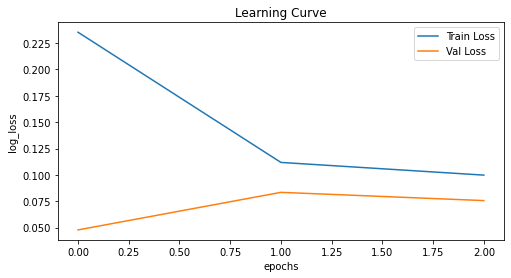

In [ ]:
#plotting the learning curve
plt.figure(figsize=(8,4))
plt.plot(results.history['loss'], label='Train Loss')
plt.plot(results.history['val_loss'], label='Val Loss')
#plt.plot( np.argmin(results.history["val_loss"]), np.min(results.history["val_loss"]), marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.title('Learning Curve')
plt.ylabel('log_loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();

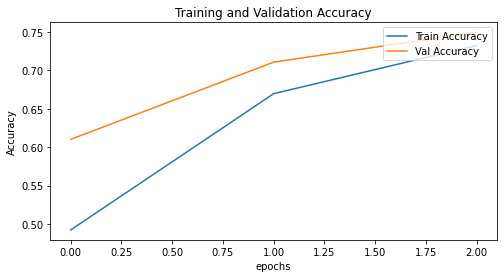

In [ ]:
#plotting the learning curve
plt.figure(figsize=(8,4))
plt.plot(results.history['mean_iou'], label='Train Accuracy')
plt.plot(results.history['val_mean_iou'], label='Val Accuracy')
#plt.plot( np.argmin(results.history["val_loss"]), np.min(results.history["val_loss"]), marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();

In [ ]:
pip install 'h5py==2.10.0' --force-reinstall

  Using cached h5py-2.10.0-cp37-cp37m-manylinux1_x86_64.whl (2.9 MB)
  Using cached numpy-1.21.4-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (15.7 MB)
  Using cached six-1.16.0-py2.py3-none-any.whl (11 kB)
  Attempting uninstall: six
    Found existing installation: six 1.16.0
    Uninstalling six-1.16.0:
      Successfully uninstalled six-1.16.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.4
    Uninstalling numpy-1.21.4:
      Successfully uninstalled numpy-1.21.4
  Attempting uninstall: h5py
    Found existing installation: h5py 2.10.0
    Uninstalling h5py-2.10.0:
      Successfully uninstalled h5py-2.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lucid 0.3.10 requires umap-learn, which is not installed.
tensorflow 1.15.2 requires gast==0.2.2, but you have gast 0.4.0 which is incompatible.
lucid 0.3.10 requir

In [ ]:
from keras.models import load_model
model1 = load_model('/content/Nucleus-Segmentation-using-Deep-Learning-master/dataset/model-dsbowl2018-1.h5', custom_objects={'mean_iou':mean_iou})
preds_train1 = model1.predict(X_train[:int(X_train.shape[0]*0.9)], verbose = 1)
preds_val1 = model1.predict(X_train[int(X_train.shape[0]*0.9):], verbose = 1)
preds_test1 = model1.predict(test_ids[:int(test_ids.shape[0]*0.9)], verbose = 1)

#Threshold predictions
preds_train_thres1 = (preds_train1 > 0.5).astype(np.uint8)
preds_val_thres1 = (preds_val1 > 0.5).astype(np.uint8)
preds_test1_thres1 = (preds_test1 > 0.5).astype(np.uint8)


In [ ]:
import h5py as a 
print(a. __version__)

2.10.0


In [ ]:
import tensorflow as tf
print(tf. __version__) 


1.15.2


In [ ]:
#performing ceck on some random sample
ix = random.randint(0, len(preds_train_thres1))

fig, ax = plt.subplots(1, 2, figsize=(6,4))
fig.subplots_adjust(hspace = 0.4, wspace = 0.4)
ax[0].imshow(np.squeeze(Y_train[ix]), cmap ='gray')
ax[1].imshow(np.squeeze(preds_train_thres1[ix]), cmap = '')
ax[0].title.set_text('Actual')
ax[1].title.set_text('Predicted')

plt.show()

NameError: ignored